# Structuring Deep Learning Projects
## 1. Orthogonalization
The main idea behind this principle is is to address different issues seperately. the general path would be as follows:

1. Make sure the algorithm performs well on training set
    * Different architechture: bigger, smaller network
    * more efficient optimization algorithms
2. Make sure the algorithm performs well on the dev/cross-validation set:
    * regularization: L2, dropout methods
3. Make sure the algorithm generalizes well on the test set:
    * Have a larger dev set
    * larger / more diverse training set
4. The system performs as intended when deployed to the real world:
    * the cost function does not fit the problem in hand
    * changing the dev and test set might help

According to the ***Orthogonalization*** Principle using the ***early stop*** tuning method is no recommended as it solves a couple of issues simultaneously: fitting the dev set and not overfitting the training set

## 2 Evaluation
### 2.1 Single Number Evaluation
The main idea is to use (or derive) a formula that adequately reflects the performance of the system in question: whether it is average, linear combination...
### 2.2 Types of Metrics
There might be several metrics (say $N$) to consider, having several possible model variants, usually the problem can be reduced to as follows: 
* 1 Optimizing Metric: the more performance, the better
* N - 1 Satisficing Metrics (mix between satisfying and sacrificing): The model should achieve a certain minial treshhold, otherwise it won't be further considered. However, beyond that threshhold, difference in performance does not matter

#### Example:
Assuming the performance is assessed with accuracy, or F1 metric and the response time is important. In this case, accuracy is the **Optimizing** metric and response time is the **Satisficing** metric. A model that achieves $99\%$ accuracy taking $2$ seconds is not a suitable candidate when the response time threshhold is $100$ ms. Between a model achieving $95$ accuracy in an average of $100$ms and another with $93$ in $50$ ms, the formal should be chosen.

## 3. Train-Dev-Test sets
### 3,1 Dev VS Test sets
It is important to understand that most of the ML/DL teams' work is to improve a model's performance on the dev set.(hyperparameter tuning mainly). For this reason, it is of major importance to have Dev and Test sets with the same distribution, or more specifically, have both dev and test sets include data for all types of classes that the model might predict on. 
#### Example
If a team is working on a system predicting whether a medium income class individual is able to repay their loan, you cannot expect the product to perform even moderately when tested on test set of low income class set.The Dev set should have included both medium and low (and potentially high) if the model was expected at a certain point to predict such individuals' behaviors.

## 4. Human-Level Performance
### 4.1 Why compare ?
When working on a machine learning model on a specific task, the model's performance can generally be plotted as follows: 

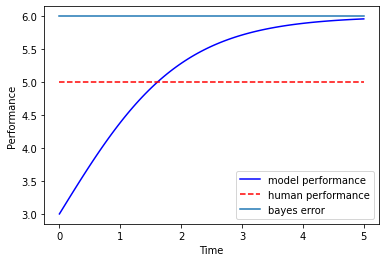

In [1]:
import numpy as np
import matplotlib.pyplot as plt
K = 5
x = np.linspace(0, 5, 100)
model_y = (K + 1) / (1 + np.exp(-x))
human_y = [K for _ in x ]
bayes_y = [K + 1 for _ in x]


fig, ax = plt.subplots()
ax.plot(x, model_y, '-b', label='model performance')
ax.plot(x, human_y, '--r', label='human performance')
ax.plot(x, bayes_y, label='bayes error')
ax.set_xlabel("Time")
ax.set_ylabel("Performance")
leg = ax.legend();

The model's performance surpasses human performance relatively fast. Yet, it starts evolving remarkably slower after hitting that threshhold. There are two main reasons:
1. The human performance in a number of tasks is quite close to optimal bayes performance.
2. There are more techniques avaible to improve the model in the first stage:
* Get labeled data from humans
* gain insight from human experts
* better analysis of bias/variance

## 4.2 Bias and human
One subtle, yet important, detail is the following: the performance on the training set is determined in relation to the Bayes error. In a good number of tasks such as computer vision, the Bayes error is estimated as the human error. This analysis holds when both train and dev sets are of the same distribution.
### 4.2.1 Example
Consider two systems each performing on two different tasks with the same results:
* Train error: $8 \%$
* DEV error: $10 \%$

The first problem is associated with a $7.5 \%$ Bayes error, while the second is associated with $1 \%$ The first problem's results indicates that the model has low-bias (slightly less performant than a human), while the second problem's results indicates that the model is high bias.
Thus the bias level is mainly determined by the difference between the model's training error and the Bayes error.

### 4.2.2 Human Level Performance
The human level performance severs as an adequate approximation for the Bayes error. Yet, there can be several human-level performance values depending on which category of humans in performing the task. With high bias models, the choice does not differ much. However, as the model improves, the choice's importance increases. It mainly depends on the model's purpose and target users.
#### Example
Suppose there are several possible estimations for human-level performances for translation:
* typical languistics student $2 \%$
* typical translator: $1 \%$
* Experienced (high tier) translator: $0.5 \%$
* Team of elite translator: $0.25\%$  
It is known that the Bayes error is less or equal to $0.25\%$. However, the choice for human-level performance is situation-dependent. consider the following scenarios:
1. 
    * Train Error: $8\%$
    * Dev Error: $9\%$
    * => it is clear that the avoidable bias is quite large and bias reduction techniques should be used
2. 
    * Train Error: $3\%$
    * Dev Error: $7\%$
    * => Regardless of the human-level estimation, the variance is too large $4\%$ which means that variance should be addressed. (then bias might be reduced for better overall performance)

3. 
    * Train Error: $1\%$
    * Dev Error: $1.2\%$
    * => It is clear that either $0.5 \%$ or $0.25 \%$ should be used as human-level estimation (if futher improvement is wanted).

4. as soon as the model performs better than the best human-level estimation, the typical error analysis is no longer exclusive. Thus, it might be worth experimenting to find an even better human-level estimation, or assume that the model is indeed overfitting. 
    


## 5 Error analysis
### 5.1 Categorizing errors
Assuming we have a DL system with a $10\%$ error for example. It is clear that the system is still high-bias. One systematic approaches is the following:  
Consider the Dev set manually and divide the wrongly labeled samples into catagories (it might take a couple of iterations to notice the patterns). The percentage of samples in each category can determine the team next direction.
#### Example
For a cat dection system, we can find a couple of categories: dogs (fluffy ones), big cats (lions, tigers..), social media fitlers...  
A reasonalbe decision is to choose the category with the largest percentage and try to improve the system's performance on that category: adding new features, maybe using ensemble learning with another model trainind to recognize that category's objects.

### 5.2 Uncorrectly Labeled data
Certain errors might not be due to the model, but to wrong labels associated with data. To determine whether fixing such labels is worthwhile depends on the overall contribution of this mistake.  
In other words, the same error analysis procedure mentioned above should be conducted. If the percentage of error due to mislabeled data is significant, then correcting labels is a wise decision. Otherwise, it might be delayed to a later stage. If labels' correction revealed worthwhile, it should include all samples (both correctly and uncorrectly classified by the model) in both test and dev sets.

## 6 Train-Dev-Test datasets
### 6.1 Distributions
In addition to the 2 datasets mentioned above, we consider the production data(set): the type of data the system will be working on once deployed. It is extremely important to have both ***DEV***, ***TEST*** and ***Production*** of the same distribution, or more imformally of the same source
* (for images: bluriness, professional/amateur, resolution...) 
* (for audio clips: type of background noise, anomalies: stuttering, kids talking, thick accent...).  
Certain techniques can be used to address differet distribution between training and other sets
### 6.2 Bias Variance analysis with different distributions
The analysis mentioned above might not be exclusive as there are two sources for the difference in error rate between train and dev sets:
1. Predecting on new data
2. The data on DEV set is from different distribution: the model is little or no trained at this type of data
Thus, it is necessary to study the effect of each cause, by adding a $4$-th portion of the data as the training-dev set. This set is similar to the training set distribution wise. Yet, it should be unseed to the model. At Each iteration, 3 errors are present:
* training error
* training-dev error
* dev error
If the training-dev error represents a significant portion of the difference between training and dev error, then The model is of ***high variance*** and proper techniques should be used. Otherwise, The system is facing a ***data mismatch*** problem.7
### 6.3 Addressing Data Mismatch
No systematic, predefined techniques were conceived to address this issue. Yet, certain guidelines do exist.
1. Conduct comparison between DEV and Training datasets
2. Use such insight to synthesize data similar to the DEV set. 
#### Note
When synthesizing data, it might be beneficial to try to diversify the synthetic data as the model might overfit to one type of data. For instance: Assuming a cat classification system struggles to recognize a rare type of cats. The DEV set is not large enough. It is worth considering that creating new data using only one type of detortion might mislead the model. It is more promising to create artificial data where the modifications include as many aspects as possible.


## 7 Transfer Learning
### 7.1 Main idea
Transfer leaning is amont the most powerful ideas in DL and ML in general. It mainly using knowledge(or some parts of it) learnt from one problem to solve another.
### 7.2 Technical implementation
Assuming a Neural Network was implemented to solve problem A. Depending on much data is avaible for problem B, these are the options:
1. Replacing the last layer and the last mapping matrix with randomized values and train only the additional matrix: few data for task B
2. Replacing the last layer and the last mapping  matrix with randomized values and train the whole NN: reasonably large data for task B
3. Either 1 or 2 but adding a number of layers before the ouput layer.
### 7.3 Favorable Circumstances
Transfer learning is fruitful provided: 
1. Tasks A and B have the same input format (images, audio clips...)
2. Task A has significantly more data than task B 
3. The early low-level features constructed by the NN in task A can be useful for task B: The problem can be a spefic subset of task A such as:
    * Moving from general speech recognition to recognizing key / trigger words
    * Moving from image classification to radiological diagnosis: x-ray images.

## 8 Multi-Task Learning
### 8.1 Main Idea
Unlike transfer learning, mutli-task learning is learning in parallel from different problems. in other words, assuming $n$ tasks, the input is no longer uni-dimensional, but $n$ dimensional where each target can have from $0$ to $n$ labels. 
### 8.2 Technical Details
assuming a loss function for a uni-dimensional target $L(y^{(i)}, \hat{y}^{(i)})$ The general cost function is: 
$ \begin{align}
    J(\theta, X, Y) = \sum_{i=1}^{m} (\sum_{j=1}^{n} L(y_j^{(i)}, \hat{y}_j^{(i)})) 
\end{align}$
A more subtle detail is that the algorithm would still perform well even with imcompletely labeled data: Make sure the summation include only labeled samples
### 8.3 Favorable circumstances
It makes sense to use this technique provided:
* trying to solve numerous tasks that can benefit from shared low-level features: faster and less expensive training
* usually small amount of data allocated to each tasks: multi-task learning use all this data for every task: potential performance boost
* resources are enough to train significantly large neural networks

